First, import the file. If you don't have it, you can download it from the following link:
https://drive.google.com/file/d/1LzjOF6AJxkDOs8mn0xr_jeHAYgo8fpoC/view?usp=sharing

In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
tcga = pd.read_csv("TCGA_all_tidy_with_metadata.csv")

Next, remove the first two columns.

In [2]:
tcga_new = tcga.iloc[:, 1:]
tcga_new.head()

,Type,patient,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,...,Subtype_miRNA,Subtype_mRNA,Subtype_other,Subtype_protein,treatment_outcome_first_course,Subtype_Selected,vital_status,tumor_status,_PATIENT,_primary_disease
0,ACC,TCGA-OR-A5LC-01,6.2537,4.7431,0.0,12.3405,10.2326,9.9114,12.6294,4.8144,...,miRNA_1,steroid-phenotype-high+proliferation,C1A,NaN,Progressive Disease,ACC.CIMP-intermediate,Dead,WITH TUMOR,TCGA-OR-A5LC,adrenocortical cancer
1,ACC,TCGA-OR-A5JJ-01,8.6468,4.4576,0.0,12.1763,10.2696,9.9354,12.6974,4.2702,...,miRNA_4,steroid-phenotype-high,C1A,NaN,Progressive Disease,ACC.CIMP-intermediate,Dead,WITH TUMOR,TCGA-OR-A5JJ,adrenocortical cancer
2,ACC,TCGA-OR-A5K3-01,8.0773,5.2181,0.0,13.4269,10.4399,10.4480,12.6752,1.8429,...,miRNA_6,steroid-phenotype-low,C1B,2.0,Complete Remission/Response,ACC.CIMP-intermediate,Alive,TUMOR FREE,TCGA-OR-A5K3,adrenocortical cancer
3,ACC,TCGA-PK-A5HA-01,8.5349,2.4357,0.0,12.3032,10.3281,10.4491,12.6055,5.0432,...,miRNA_5,steroid-phenotype-low,C1B,2.0,Complete Remission/Response,ACC.CIMP-high,Alive,TUMOR FREE,TCGA-PK-A5HA,adrenocortical cancer
4,ACC,TCGA-OR-A5LN-01,8.9196,5.8492,0.0,12.4274,10.4852,11.0181,13.1200,2.4917,...,miRNA_6,steroid-phenotype-low,C1B,2.0,Complete Remission/Response,ACC.CIMP-low,Alive,TUMOR FREE,TCGA-OR-A5LN,adrenocortical cancer


Now, filter out the non-cancer types.

In [3]:
bad = ['Solid Tissue Normal', 'Recurrent Tumor', 'Additional - New Primary', 'Additional Metastatic']
tcga_clean = tcga_new[~tcga_new.sample_type.isin(bad)]

Now select your cancer type only. If you want to have all of the cancer types, you can skip this cell.

In [4]:
brca = tcga_clean[tcga_clean['Type'] == 'BRCA']
brca.head()

,Type,patient,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,...,Subtype_miRNA,Subtype_mRNA,Subtype_other,Subtype_protein,treatment_outcome_first_course,Subtype_Selected,vital_status,tumor_status,_PATIENT,_primary_disease
505,BRCA,TCGA-AR-A5QQ-01,9.5074,1.5787,0.0000,11.3676,11.1292,9.9722,11.5966,3.2396,...,NaN,Basal,NaN,NaN,NaN,BRCA.Basal,Dead,WITH TUMOR,TCGA-AR-A5QQ,breast invasive carcinoma
506,BRCA,TCGA-D8-A1JA-01,7.4346,3.6607,0.6245,11.9181,13.5273,10.8702,12.3048,2.5547,...,NaN,Her2,NaN,NaN,NaN,BRCA.Her2,Alive,WITH TUMOR,TCGA-D8-A1JA,breast invasive carcinoma
507,BRCA,TCGA-BH-A0BQ-01,9.3216,2.7224,0.5526,11.9665,11.4105,10.4406,12.8186,4.7115,...,NaN,LumA,NaN,NaN,NaN,BRCA.LumA,Alive,TUMOR FREE,TCGA-BH-A0BQ,breast invasive carcinoma
508,BRCA,TCGA-BH-A0BT-01,9.0198,1.3414,0.0000,13.1881,11.0911,10.4244,12.6427,2.7553,...,NaN,LumA,NaN,NaN,NaN,BRCA.LumA,Alive,TUMOR FREE,TCGA-BH-A0BT,breast invasive carcinoma
509,BRCA,TCGA-A8-A06X-01,9.6417,0.5819,0.0000,12.0036,11.2545,10.1480,12.6622,4.2765,...,NaN,LumB,NaN,NaN,NaN,BRCA.LumB,Dead,TUMOR FREE,TCGA-A8-A06X,breast invasive carcinoma


Now, we have our clean file, we can graph. Change X and Y to the genes that you want.

Cor value is 0.378


Text(33.37500000000001, 0.5, 'ASS1')

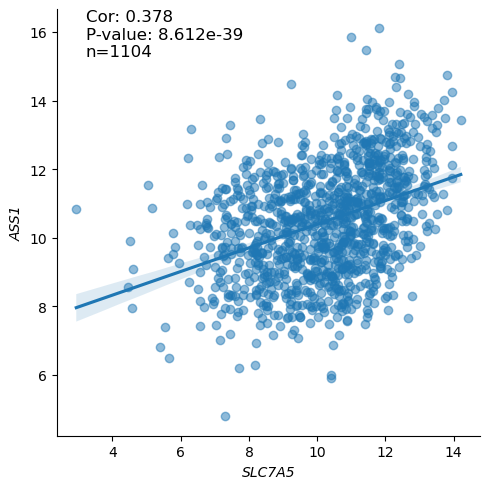

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
x = 'SLC7A5'
y = 'ASS1'
x20 = brca[x].max() / 5
y80 = brca[x].max() * 0.95
cor = brca[x].corr(brca[y])
cor = round(cor, 3)
print("Cor value is", round(cor, 3))
fgrid = sns.lmplot(x="ASS1", y="SLC7A5", data=brca, scatter_kws={"alpha":0.5})
ax = fgrid.axes[0,0]
_, p_value = pearsonr(brca[x], brca[y])
p_value_formatted = format(p_value, '.3e')
ax.text(x20, y80, f"Cor: {cor}\nP-value: {p_value_formatted}\nn={len(brca)}", fontsize=12)
ax.set_xlabel(f"{x}", fontstyle='italic')
ax.set_ylabel(f"{y}", fontstyle='italic')

